In [ ]:
# From AML studio it looks like:
# library("AzureML")
# ws <- workspace()
# dat <- download.datasets(ws, "paho-who-cases-reported-2016-03-02.csv")

# Otherwise:

dat <- read.csv("paho-who-cases-reported-2016-03-02.csv")

In [ ]:
head(dat, n = 50)

In [ ]:
# install.packages('dplyr', repos = "http://cloud.r-project.org")

In [ ]:
library(dplyr)
summary(dat)
colnames(dat)

library(dplyr)

dat_susp <- filter(dat, Measure.Names == 'Suspected') #Suspected.cases > 0)
head(dat_susp)

dat_conf <- filter(dat, Measure.Names != 'Suspected')
head(dat_conf)

In [ ]:
# Interactive graphics
# replace the lib argument with your local user library
# install.packages(c("DT", "htmlwidgets"),
#                 repos = "http://cloud.r-project.org")

In [ ]:
# World map plotting packages
install.packages(c("rworldmap", "RColorBrewer"),
                repos = "http://cloud.r-project.org")

In [21]:
# Convert categorical to numerical - remove ','
susp.cases.num <- gsub(",", "", dat_susp$Measure.Values, fixed = T)
dat_susp$Measure.Values <- as.numeric(susp.cases.num)
head(dat_susp)

,Country...territory,Measure.Names,Month.of.Date,Report.Epi.Week,Year.of.Date,Country...territory.1,Date,Measure.Values,Laboratory.confirmed.cases,Suspected.cases,ISO3
1,Aruba,Suspected,January,1,2016,Aruba,"January, 2016",0,0,0,ABW
2,Aruba,Suspected,January,2,2016,Aruba,"January, 2016",0,0,0,ABW
3,Aruba,Suspected,January,3,2016,Aruba,"January, 2016",0,0,0,ABW
4,Aruba,Suspected,January,4,2016,Aruba,"January, 2016",0,0,0,ABW
5,Barbados,Suspected,January,1,2016,Barbados,"January, 2016",0,3,0,BRB
6,Barbados,Suspected,January,2,2016,Barbados,"January, 2016",0,0,0,BRB


In [20]:
library(rworldmap)
head(countrySynonyms)

,ID,ISO3,name1,name2,name3,name4,name5,name6,name7,name8
1,1,afg,Afghanistan,Islamic State of Afghanistan,,,,,,NA
2,2,ala,Aland Islands,,,,,,,NA
3,3,alb,Albania,Republic of Albania,,,,,,NA
4,4,dza,Algeria,People's Democratic Republic of Algeria,,,,,,NA
5,5,asm,American Samoa,Territory of American Samoa,,,,,,NA
6,6,and,Andorra,Principality of Andorra,,,,,,NA


In [19]:
tmp <- aggregate(dat_susp$Measure.Values, by=list(Country...territory = dat_susp$Country...territory), FUN=sum)
head(tmp)

,Country...territory,x
1,Aruba,0
2,Barbados,277
3,Brazil,1490
4,Colombia,41094
5,Costa Rica,0
6,Dominican Republic,395


In [17]:
library(rworldmap)
library(RColorBrewer)


# Some renaming of Countries needs to happen because of non-standard names in dataset
dat_susp[which(dat_susp$Country...territory == 'Bolivia'), 
         "Country...territory"] <- 'Bolivia, Plurinational State of'
dat_susp[which(dat_susp$Country...territory == 'Bonaire'), "Country...territory"] <- 'Bonaire, Sint Eustatius and Saba'
dat_susp[which(dat_susp$Country...territory == 'Curacao'), "Country...territory"] <- 'CuraÃ§ao'
dat_susp[which(dat_susp$Country...territory == 'Saint Martin'), "Country...territory"] <- 'Saint Martin (French part)'
dat_susp[which(dat_susp$Country...territory == 'Sint Maarten'), "Country...territory"] <- 'Sint Maarten (Dutch part)'
dat_susp[which(dat_susp$Country...territory == 'United States Virgin Islands'), "Country...territory"] <- 'Virgin Islands, U.S.'
dat_susp[which(dat_susp$Country...territory == 
               'Venezuela'), "Country...territory"] <- 'Venezuela, Bolivarian Republic of'


dat_susp$ISO3 <- 'none'

head(dat_susp)


for (i in 1:nrow(dat_susp)) {
    name <- dat_susp[i, 'Country...territory']
    x <- countrySynonyms[which(countrySynonyms$name1 == name), 'ISO3']
    if (length(x) > 0) {
        dat_susp[i, 'ISO3'] <- toupper(x)
    } else {
        dat_susp[i, 'ISO3'] <- 'none'
    }
}

head(dat_susp)

Warning message:
In `[<-.factor`(`*tmp*`, iseq, value = c("Bolivia, Plurinational State of", : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = c("Bonaire, Sint Eustatius and Saba", : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = c("CuraÃƒÂ§ao", "CuraÃƒÂ§ao", : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = c("Saint Martin (French part)", : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = c("Sint Maarten (Dutch part)", : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = c("Virgin Islands, U.S.", : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = c("Venezuela, Bolivarian Republic of", : invalid factor level, NA generated

,Country...territory,Measure.Names,Month.of.Date,Report.Epi.Week,Year.of.Date,Country...territory.1,Date,Measure.Values,Laboratory.confirmed.cases,Suspected.cases,ISO3
1,Aruba,Suspected,January,1,2016,Aruba,"January, 2016",0,0,0,none
2,Aruba,Suspected,January,2,2016,Aruba,"January, 2016",0,0,0,none
3,Aruba,Suspected,January,3,2016,Aruba,"January, 2016",0,0,0,none
4,Aruba,Suspected,January,4,2016,Aruba,"January, 2016",0,0,0,none
5,Barbados,Suspected,January,1,2016,Barbados,"January, 2016",0,3,0,none
6,Barbados,Suspected,January,2,2016,Barbados,"January, 2016",0,0,0,none


,Country...territory,Measure.Names,Month.of.Date,Report.Epi.Week,Year.of.Date,Country...territory.1,Date,Measure.Values,Laboratory.confirmed.cases,Suspected.cases,ISO3
1,Aruba,Suspected,January,1,2016,Aruba,"January, 2016",0,0,0,ABW
2,Aruba,Suspected,January,2,2016,Aruba,"January, 2016",0,0,0,ABW
3,Aruba,Suspected,January,3,2016,Aruba,"January, 2016",0,0,0,ABW
4,Aruba,Suspected,January,4,2016,Aruba,"January, 2016",0,0,0,ABW
5,Barbados,Suspected,January,1,2016,Barbados,"January, 2016",0,3,0,BRB
6,Barbados,Suspected,January,2,2016,Barbados,"January, 2016",0,0,0,BRB


431 codes from your data successfully matched countries in the map
177 codes from your data failed to match with a country code in the map
221 codes from the map weren't represented in your data


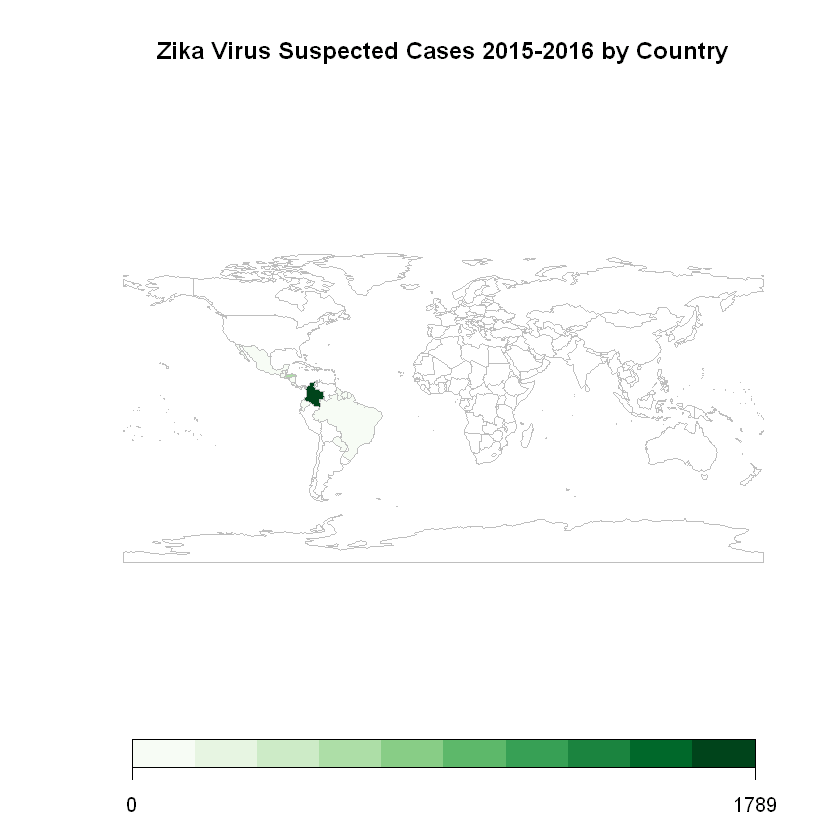

In [18]:
sPDF <- joinCountryData2Map(dF = dat_susp, joinCode = "ISO3", nameJoinColumn = "ISO3")

# using your green colours

numCats <- 10 #set number of categories to use
palette = colorRampPalette(brewer.pal(n=9, name='Greens'))(numCats)
mapCountryData(sPDF, 
               mapTitle = 'Zika Virus Suspected Cases 2015-2016 by Country',
               nameColumnToPlot="Measure.Values",
               catMethod="fixedWidth", 
               numCats=numCats, 
               colourPalette=palette)


In [ ]:
print('hello Berlin!')

In [ ]:
# install.packages('plotly', repos = "http://cloud.r-project.org")

In [ ]:
# Work in progress...

# # Scatter Plot
# library(plotly)

# set.seed(123)

# x <- rnorm(1000)
# y <- rchisq(1000, df = 1, ncp = 0)
# group <- sample(LETTERS[1:5], size = 1000, replace = T)
# size <- sample(1:5, size = 1000, replace = T)

# ds <- data.frame(x, y, group, size)

# p <- plot_ly(ds, x = x, y = y, mode = "markers", group = group, size = size) %>%
#   layout(title = "Scatter Plot")
# embed_notebook(p)

In [ ]:
# library(plotly)

# set.seed(100)
# d <- diamonds[sample(nrow(diamonds), 1000), ]
# p <- plot_ly(d, x = carat, y = price, text = paste("Clarity: ", clarity),
#         mode = "markers", color = carat, size = carat)

# embed_notebook(p)